In [1]:
!pip install pandas requests


In [2]:
import pandas as pd
import requests
import json


In [3]:
#API key
API_KEY = 'c16ee0e2c0254295a624f21454282715'

# API endpoint
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# Series ID (Total Non-Farm Workers)
series_id = 'CES0000000001'

# Request data for the last year
headers = {'Content-type': 'application/json'}
data = {
    "seriesid": [series_id],
    "startyear": "2022",
    "endyear": "2023",
    "registrationkey": API_KEY
}

#API request
response = requests.post(url, json=data, headers=headers)

# Check the response
if response.status_code == 200:
    print("Data fetched successfully!")
    json_data = response.json()
else:
    print("Error:", response.status_code)
    print(response.text)


Data fetched successfully!


In [4]:
# Extract series data
series_data = json_data['Results']['series'][0]['data']

df = pd.DataFrame(series_data)

df['value'] = df['value'].astype(float)  # Convert values to float
df['year_month'] = df['year'] + '-' + df['period'].str[1:]  # Combine year and month
df = df[['year_month', 'value']].sort_values('year_month')  # Select and sort relevant columns

print(df.head())
df.to_csv('non_farm_workers.csv', index=False)


   year_month     value
23    2022-01  150014.0
22    2022-02  150876.0
21    2022-03  151370.0
20    2022-04  151642.0
19    2022-05  151928.0


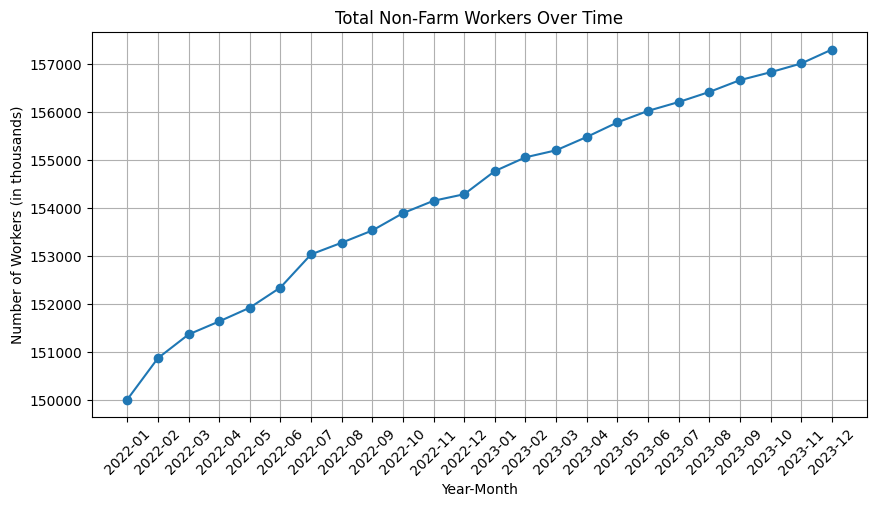

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['year_month'], df['value'], marker='o')
plt.xticks(rotation=45)
plt.title('Total Non-Farm Workers Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Workers (in thousands)')
plt.grid()
plt.show()


In [6]:
#more series IDs
series_ids = ['CES0000000001',  # Total Non-Farm Workers
              'LNS14000000']    # Unemployment Rate

# Update the request
data = {
    "seriesid": series_ids,
    "startyear": "2022",
    "endyear": "2023",
    "registrationkey": API_KEY
}

#API request
response = requests.post(url, json=data, headers=headers)

# Check the response
if response.status_code == 200:
    print("Data fetched successfully!")
    json_data = response.json()
else:
    print("Error:", response.status_code)
    print(response.text)

# Process multiple series
df_list = []
for series in json_data['Results']['series']:
    series_id = series['seriesID']
    series_data = pd.DataFrame(series['data'])
    series_data['value'] = series_data['value'].astype(float)
    series_data['year_month'] = series_data['year'] + '-' + series_data['period'].str[1:]
    series_data['series_id'] = series_id  # Add series ID for differentiation
    series_data = series_data[['year_month', 'value', 'series_id']].sort_values('year_month')
    df_list.append(series_data)

combined_df = pd.concat(df_list)
print(combined_df.head())
combined_df.to_csv('bls_data_combined.csv', index=False)

Data fetched successfully!
   year_month     value      series_id
23    2022-01  150014.0  CES0000000001
22    2022-02  150876.0  CES0000000001
21    2022-03  151370.0  CES0000000001
20    2022-04  151642.0  CES0000000001
19    2022-05  151928.0  CES0000000001


In [7]:
import os

def update_bls_data(file_path='bls_data_combined.csv'):
    # Load existing data if the file exists
    if os.path.exists(file_path):
        existing_df = pd.read_csv(file_path)
    else:
        existing_df = pd.DataFrame(columns=['year_month', 'value', 'series_id'])

    # Fetch new data
    response = requests.post(url, json=data, headers=headers)
    if response.status_code != 200:
        print("Error fetching data")
        return

    # Process data as before
    json_data = response.json()
    new_data_list = []
    for series in json_data['Results']['series']:
        series_id = series['seriesID']
        series_data = pd.DataFrame(series['data'])
        series_data['value'] = series_data['value'].astype(float)
        series_data['year_month'] = series_data['year'] + '-' + series_data['period'].str[1:]
        series_data['series_id'] = series_id
        series_data = series_data[['year_month', 'value', 'series_id']].sort_values('year_month')
        new_data_list.append(series_data)

    new_df = pd.concat(new_data_list)

    # Merge with existing data and drop duplicates
    combined_df = pd.concat([existing_df, new_df]).drop_duplicates()

    # Save updated dataset
    combined_df.to_csv(file_path, index=False)
    print("Data updated successfully!")

# Call the update function
update_bls_data()


Data updated successfully!


In [8]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


2024-12-15 19:03:59.282 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:03:59.838 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-15 19:03:59.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:03:59.849 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:03:59.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:03:59.859 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:03:59.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:03:59.865 Session state does not 

DeltaGenerator()

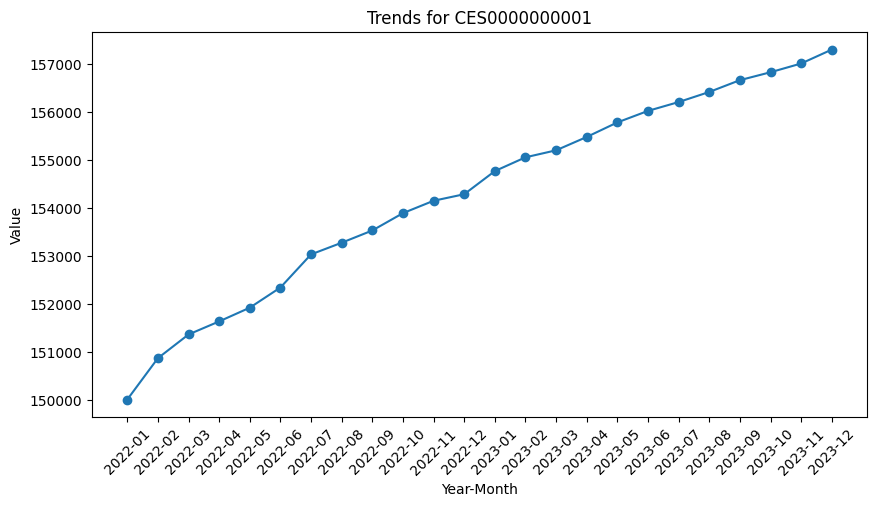

In [9]:
#for local machine(app.py)
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'bls_data_combined.csv'
df = pd.read_csv(data_path)

# Streamlit Dashboard
st.title("US Labor Statistics Dashboard")

# Dropdown to select a series
series_ids = df['series_id'].unique()
selected_series = st.selectbox("Select a Series", series_ids)

# Filter data for the selected series
filtered_df = df[df['series_id'] == selected_series]

# Plot the data
st.write(f"Data for Series: {selected_series}")
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(filtered_df['year_month'], filtered_df['value'], marker='o')
ax.set_title(f"Trends for {selected_series}")
ax.set_xlabel("Year-Month")
ax.set_ylabel("Value")
plt.xticks(rotation=45)
st.pyplot(fig)

# Display raw data
st.write("Raw Data:")
st.dataframe(filtered_df)


In [10]:
import os

def update_bls_data(file_path='bls_data_combined.csv'):
    # Load existing data if the file exists
    if os.path.exists(file_path):
        existing_df = pd.read_csv(file_path)
    else:
        existing_df = pd.DataFrame(columns=['year_month', 'value', 'series_id'])

    # Fetch new data
    response = requests.post(url, json=data, headers=headers)
    if response.status_code != 200:
        print("Error fetching data")
        return

    # Process data as before
    json_data = response.json()
    new_data_list = []
    for series in json_data['Results']['series']:
        series_id = series['seriesID']
        series_data = pd.DataFrame(series['data'])
        series_data['value'] = series_data['value'].astype(float)
        series_data['year_month'] = series_data['year'] + '-' + series_data['period'].str[1:]
        series_data['series_id'] = series_id
        series_data = series_data[['year_month', 'value', 'series_id']].sort_values('year_month')
        new_data_list.append(series_data)

    new_df = pd.concat(new_data_list)

    # Merge with existing data and drop duplicates
    combined_df = pd.concat([existing_df, new_df]).drop_duplicates()

    # Save updated dataset
    combined_df.to_csv(file_path, index=False)
    print("Data updated successfully!")

# Call the update function
update_bls_data()


Data updated successfully!


In [11]:
#test2
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'bls_data_combined.csv'
df = pd.read_csv(data_path)

# Streamlit Dashboard
st.title("US Labor Statistics Dashboard")

# Dropdown to select a series
series_ids = df['series_id'].unique()
selected_series = st.selectbox("Select a Series", series_ids)

# Filter data for the selected series
filtered_df = df[df['series_id'] == selected_series]

# Plot the data
st.write(f"Data for Series: {selected_series}")
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(filtered_df['year_month'], filtered_df['value'], marker='o')
ax.set_title(f"Trends for {selected_series}")
ax.set_xlabel("Year-Month")
ax.set_ylabel("Value")
plt.xticks(rotation=45)
st.pyplot(fig)

# Display raw data
st.write("Raw Data:")
st.dataframe(filtered_df)


2024-12-15 19:04:16.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:04:16.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:04:16.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:04:16.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:04:16.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:04:16.449 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:04:16.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 19:04:16.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [14]:
print(response.json())

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 159, 'message': [], 'Results': {'series': [{'seriesID': 'CES0000000001', 'data': [{'year': '2023', 'period': 'M12', 'periodName': 'December', 'value': '157304', 'footnotes': [{}]}, {'year': '2023', 'period': 'M11', 'periodName': 'November', 'value': '157014', 'footnotes': [{}]}, {'year': '2023', 'period': 'M10', 'periodName': 'October', 'value': '156832', 'footnotes': [{}]}, {'year': '2023', 'period': 'M09', 'periodName': 'September', 'value': '156667', 'footnotes': [{}]}, {'year': '2023', 'period': 'M08', 'periodName': 'August', 'value': '156421', 'footnotes': [{}]}, {'year': '2023', 'period': 'M07', 'periodName': 'July', 'value': '156211', 'footnotes': [{}]}, {'year': '2023', 'period': 'M06', 'periodName': 'June', 'value': '156027', 'footnotes': [{}]}, {'year': '2023', 'period': 'M05', 'periodName': 'May', 'value': '155787', 'footnotes': [{}]}, {'year': '2023', 'period': 'M04', 'periodName': 'April', 'value': '155484', 'footnotes': [{}]

In [24]:
import requests
import pandas as pd

# BLS API Configuration
API_KEY = 'c16ee0e2c0254295a624f21454282715'  #API Key
BLS_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
HEADERS = {'Content-type': 'application/json'}

# Define the series IDs and payload
SERIES_IDS = [
    "CES0000000001",  # Total Non-Farm Workers
    "LNS14000000"     # Unemployment Rate
]
payload = {
    "seriesid": SERIES_IDS,
    "startyear": "2022",
    "endyear": "2023",
    "registrationkey": API_KEY
}

# Fetch data from the API
try:
    response = requests.post(BLS_URL, json=payload, headers=HEADERS)
    response.raise_for_status()
    json_data = response.json()
    print("Data fetched successfully!")

    # Save the raw response for debugging
    with open("raw_bls_response.json", "w") as f:
        import json
        json.dump(json_data, f, indent=4)

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from BLS API: {e}")


Data fetched successfully!


In [25]:
# Function to process the BLS data
def process_bls_data(json_data):
    series_list = []

    # Ensure the response contains the 'series' key
    if 'Results' in json_data and 'series' in json_data['Results']:
        for series in json_data['Results']['series']:
            series_id = series['seriesID']
            for entry in series['data']:
                series_list.append({
                    "series_id": series_id,
                    "year": entry['year'],
                    "period": entry['period'],
                    "period_name": entry['periodName'],
                    "value": float(entry['value']),  # Convert value to float
                })

    # Create a DataFrame and format it
    df = pd.DataFrame(series_list)
    df['year_month'] = df['year'] + '-' + df['period'].str[1:]
    df = df[['series_id', 'year_month', 'value', 'year', 'period', 'period_name']]

    # Save to CSV
    df.to_csv("bls_data_combined.csv", index=False)
    print("Data processed and saved as 'bls_data_combined.csv'")
    return df

# Process the fetched data
df = process_bls_data(json_data)


Data processed and saved as 'bls_data_combined.csv'
